# Lab 8: Applications of Markov chains and graphs

In this lab we will be looking at some applications of Markov chains and graphs, namely, the page rank algorithm, an introduction to statistical inference with a Markov model, and cache replacement policies.

Below is the code to import the modules we will be using throughout this lab.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
import csv as csv
import networkx as nx
print "Modules Imported!"

# Markov chain object similar to random variable objects in scipy.stats (st)

class Markov_chain:
    def __init__(self, P, pi0):   # The transition probability matrix and initial distribution are passed
        self.P = P 
        self.pi0 = pi0
        self.n=np.size(pi0)
        if np.shape(P) != (self.n,self.n):
            print "Error: Shape of P doesn't match pi0"
   
    def rvs(self,T):     # produce a length T segment of variates of the random process
        X = [np.random.choice(self.n, p=self.pi0)]  # p is a needed input for np.random.choice()
        for t in range(1,T):
            X.append(np.random.choice(self.n, p=self.P[X[t-1],:])) 
        return np.array(X)
    
    def pi(self,t):    # produce probability distribution at time t
        pi_new=self.pi0
        for s in range(t):
            pi_new = np.dot(pi_new, self.P)    # one step update of probability distribution
        return pi_new
print "Markov_chain class defined"

Modules Imported!
Markov_chain class defined


## Page Rank Algorithm

Now that we see how to generate, manipulate, and plot graphs, we can investigate Page's ranking algorithm for webpages, which uses a Markov chain based on the graphical structure of the set of web pages on the Internet.  Suppose now that we have a directed graph that represents a set of web pages; a link from one webpage to another designates that the first webpage has a hyperlink to the second webpage.   Then webpages that have more incoming edges should have a higher rank.   If the webpages pointing into a particular webpage have higher ranks, then the ranking of the webpage pointed to should be even higher.    These ideas are encapsulated in the pagerank algorithm, which is based on a Markov chain with the following one-step transition probability matrix:  
$p_{i,j} = \frac{dA_{i,j}}{\mbox{out_degree}(i)} +  \frac{1-d}{n}.$  Here $A$ represents the adjacency matrix of the graph, so that $A_{i,j}=1$ if there is an edge from $i$ to $j,$  and $A_{i,j}=0$ otherwise.
Originally Google used $d$=85%. That is, if the current state is $i$, then a biased coin is flipped with heads showing with probability $d.$   If heads shows, then the next state is one of the nodes pointed to by node $i,$  with all choices having equal probability.  If tails shows, the next node is selected at random from among all nodes in the graph, each with equal probability.  There is a slight problem about what to do if a node has outdegree zero because in that case the first term is not well defined; you will be asked to address this problem.

The following code generates a random directed graph, and then ranks the popularity of the nodes in the graph using the pagerank method. The code uses the adjacency matrix of the graph, mentioned above. Instead of using the equilibrium distribution for the Markov chain, we use the probability distribution of the chain after 100 time steps.  The row sums of the adjacency matrix give the outdegrees.  One way to think about it is that the Markov chain models a person randomly clicking through webpages.  Pages are ranked according to the probability distribution of which page the person has reached after 100 time steps.

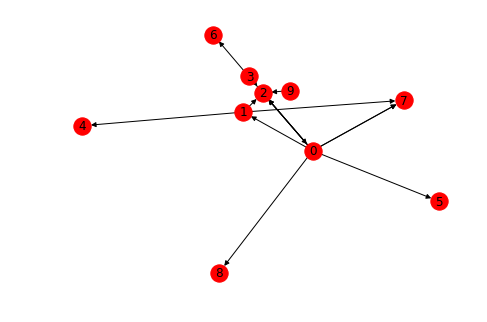

rank vector [ 7.  10.   6.   8.5  3.   4.5  1.   2.   4.5  8.5]
Simulated state sequence:  [9 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 1 2 2 0 7 7 7 7 7 4 4 2 6
 4 4 4 4 4 4 7 7 7 7 7 7 0 0 2 8 8 8 8 8 7 7 7 7 7 7 7 7 5 5 5 0 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 1 7 9 2]


In [17]:
# A simulation of the pagerank algorithm
#import networkx as nx

# Create a random directed graph object and plot it:
G = nx.scale_free_graph(10, alpha=0.2, beta=0.4, gamma=0.4)   
nx.draw(G,with_labels=1)
plt.show()

# Next we add identity matrix to the adjacency matrix, which
# is equivalent to adding a self loop to each node.
# This is a way to make the out degree of every node nonzero.
# nx returns adjacency matrix in Scipy sparse format; toarray() converts to dense format
n = G.number_of_nodes()
A = np.array(nx.adjacency_matrix(G).toarray()) + np.identity(n)
                                                       
d=0.85    # continuation parameter for pagerank
 # Next, define transition probability matrix for page rank algoritm
P=d*A/A.sum(axis=1)[:,np.newaxis]  + ((1-d)/n)*np.ones((n,n))   # This line of code is crucial to answer part 2 of Problem 1. 
pi0=np.ones((n))/n 

markov=Markov_chain(P, pi0)  # Uses Markov_chain class defined in first code cell above
    
print "rank vector", st.rankdata(-markov.pi(100))  # larger probabilities map to smaller numbers
print "Simulated state sequence: ", markov.rvs(100)   # Prints simulation of Markov chain

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>** Run the above code and examine the output for a few graphs.  The nodes are numbered from 0 to n-1, and the rank vector gives the popularity rank for each node.  For example, the position of the one in the rank vector denotes the most popular node.
<ol><li> Qualitatively comment on the graphs. Where does it appear that the most popular nodes are?</li>
<li> The above code uses a particular method to deal with nodes that have no neighbors.   Perhaps it is not fair, because it rewards nodes that have no links to other nodes.   Propose and implement another method for dealing with nodes that have no outgoing links that you think is better.  Explain why you think your method is better.</li>

__Answer:__ (Your answer here)
    node 2 looks like the most popular one

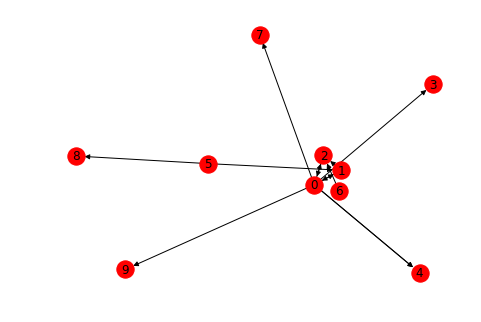

rank vector [1.  3.  2.  6.  4.  9.5 9.5 6.  8.  6. ]
Simulated state sequence:  [3 7 5 8 3 0 2 0 8 6 7 1 0 7 4 4 0 4 7 6 6 2 0 1 6 2 0 2 0 1 0 2 0 4 3 2 0
 1 0 2 0 4 1 3 5 1 2 0 4 6 2 0 3 6 7 9 9 9 6 2 0 4 3 9 8 0 7 9 7 2 0 8 9 0
 4 2 1 1 0 7 0 3 5 2 0 2 9 5 1 3 9 6 2 0 4 6 7 3 7 7]


In [105]:
# 1
# node 2 looks like the most popular one

# 2
# the code in the line add a indentical matrix to avoid the situation
# where there are no ones in the row. This casue that when the state is at
# an isolated node, the probability of staying at this node is d/sum(this row)=d
# which is 85% in this certain question. But in the introduction part, the probality 
# of going to other node should be equally distrbuted.

# Create a random directed graph object and plot it:
G2 = nx.scale_free_graph(10, alpha=0.2, beta=0.4, gamma=0.4)   
nx.draw(G2,with_labels=1)
plt.show()

n2 = G2.number_of_nodes()
A2 = np.array(nx.adjacency_matrix(G2).toarray())

d=0.85    # continuation parameter for pagerank


# define transition probability matrix

Sum = A2.sum(axis=1)[:,np.newaxis]
P2 = np.zeros([n2,n2])

# find the situation where the node is isolated 
# and uniformly distribute the probability to all nodes

for i in range(n2):
    if Sum[i] == 0:
        P2[i] = [(1.0/n2) for k in range(n2)]
    else:
        P2[i] = d*A2[i]/Sum[i]  + ((1-d)/n2) 

pi02=np.ones((n2))/n2 

markov2 = Markov_chain(P2, pi02)  # Uses Markov_chain class
    
print "rank vector", st.rankdata(-markov2.pi(100))  # larger probabilities map to smaller numbers
print "Simulated state sequence: ", markov2.rvs(100)   # Prints simulation of Markov chain

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 1</SPAN>**

## Some statistical inference for Markov chains

To prepare for statistical inference for Markov chains, we begin by considering the maximum likelihood (ML) estimator for the distribution of a  sequence of independent, identically distributed discrete random variables.   Specifically, suppose p=[p[0], . . . , p[n-1]] is a probability vector for random variables taking values in {0,1, . . . , n-1}.   That is, p[i] is the probability a generated random variable is equal to i.
Suppose that you don't know what the vector p is, but you observe a sequence of T independent random variables that were generated using p.  How would you estimate p?   A natural guess is to use p_hat[i]=(number of samples equal to i)/T.   Basically, p_hat is just a normalized histogram of p.  It can be shown that this choice of p_hat is the maximum likelihood (ML) estimator of p.  (The usual proof is to use a Lagrange multiplier for the constraint p[0]+ . . . + p[n-1]=1.)  Try running the following code several times and see how well p_hat approximates p.  If T is increased the estimates become more accurate.

In [99]:
p=np.array([0.2,0.2,0.4,0.2])
c=np.arange(np.size(p))
Xcstm = st.rv_discrete(values = (c,p))
T=100  # Number of values generated
values = Xcstm.rvs(size = T)
# print values
p_hat=np.bincount(values,minlength=np.size(p))/1./np.size(values)
print "    p:", p
print "p_hat:", p_hat,"(estimate of p based on ", T, "values)"
print "Sum of squared errors:", np.linalg.norm(p-p_hat)**2.  # the norm method calculates the 2-norm by default

    p: [0.2 0.2 0.4 0.2]
p_hat: [0.22 0.23 0.38 0.17] (estimate of p based on  100 values)
Sum of squared errors: 0.0026000000000000007


The same principle can be used to estimate the transition probability matrix for a Markov chain.  
<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>**   Generate a length T simulation of a four state Markov chain using some initial distriubution and some 4x4 transition probability matrix P.  Select P to have some zeros in it, but make sure the process can eventually get to any state starting from any other state.  Then, taking the generated sequence as the only input, generate an estimate, P_hat, of the matrix P.   Your estimator should be more accurate for larger values of T.  (Hint:  For a given state i, the ith row of P is the probability distribution of the next state, given the current state is i.  So to estimate the ith row of P, you should focus on the states that occur just after state i is visited.)

In [34]:
# lets first create a Markov chain
# initial state p0
p0 = [0.3, 0.0, 0.4, 0.3]
# state numbers
c = [0, 1, 2, 3]
# initial probability matrix P (randomly selected by myself)
p = np.array([[0.4, 0.0, 0.1, 0.5],
     [0.0, 0.2, 0.7, 0.1],
     [0.5, 0.3, 0.1, 0.1],
     [0.4, 0.2, 0.3, 0.1]])

# generate Markov chain and stimulate T times
markov = Markov_chain(p, p0)
T = 1000

test = markov.rvs(T)

# count the total number of each state
count = np.bincount(test,minlength=np.size(p0))[:,np.newaxis]

# init Mcount to hold the counts
Mcount = np.zeros([4,4])

# now add the test result in to a matrix
for i in range(T-1):
                # the result of the first sim is related to the init state
                # so we will not count it so is a range T-1 
    # increment the count in the matrix at [row -> the state before] [col -> the current state]
    Mcount[test[i]][test[i+1]] += 1

# now we divide the Mcount matrix to get the p_hat

p_hat = Mcount/count


print "p:\n",p,"\n"
print "p_hat:\n",p_hat
print "\nSum of squared errors:",np.linalg.norm(p-p_hat)**2.

    

p:
[[0.4 0.  0.1 0.5]
 [0.  0.2 0.7 0.1]
 [0.5 0.3 0.1 0.1]
 [0.4 0.2 0.3 0.1]] 

p_hat:
[[0.42934783 0.         0.08695652 0.48369565]
 [0.         0.19135802 0.74691358 0.0617284 ]
 [0.48962656 0.33609959 0.08298755 0.08713693]
 [0.40174672 0.21834061 0.29257642 0.08733624]]

Sum of squared errors: 0.007458122156163192


**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 2</SPAN>**

## Cache Replacement Policy:

A cache is used to hold information so the information can be retrieved more quickly than going through memory. Suppose you have a memory or server that holds $n$ elements and you have a cache that holds $k$ elements ($n>k$). When you want to retrieve an item, you first search through the cache. If the item is in the cache, it is considered a hit. If it's not in the cache, it's considered a miss. When a miss occurs, you have the longer process of searching for the item in memory. A key question for cache design is what items to keep in the cache? When you have a miss should you place that item in the cache?  If so, what item in the cache should you replace (i.e. drop from the cache to make room)?  Since it's unlikely the items will be uniformly searched for (some items will be more popular than others) many policies have been developed to try and maximize the liklihood that a requested item will be in the cache. A few are listed below:
<ol>
    <li> Belady's Algorithm: This is considered to be the most efficient algorithm possible. When a miss occurs, it retrieves that item and replaces an item in the cache with it. The item that's replaced is the item that will not be retrieved for the longest time in the future. It is a practically impossible algorithm because it requires knowledge of how far in the future an item will needed. </li><br>
    <li>Least Recently Used (LRU): You can think of this algorithm as a first in first out queue. When a miss occurs, that element gets retrieved from memory and gets put at the top of that queue. It replaces the item in the cache that was retrieved the longest time ago. When a hit occurs, that item gets put back to the top of the queue.</li><br>
    <li>Random Replacement (RR): This algortihm is similiar to the LRU algorithm except the miss replaces an element that was previously in the cache, selected uniformly at random.</li><br>
    <li>Least Frequently Used (LFU): In this algorithm the miss replaces the element in the cache that is the least frequently used. It's a little more complicated because you need to keep a count on the number of hits an element in the cache gets over a certain time period, or something similar. </li><br>
</ol>

Let's try and simulate the Least Recently Used policy. In your folder should be a file called all_names.csv. We are going to load this in and use it as the memory. We are also going to set up an ordered array to represent the cache. Then we're going to simulate retrievals of information based on a Zipf distribution and see what our experimental hit percentage is.

Hit Percentage: 0.3476


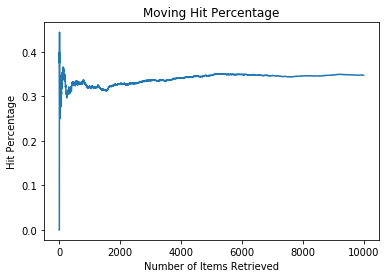

In [35]:
#Loads the CSV file
def load_file(filename):
    names = []
    try:
        f = open(filename)
        reader = csv.reader(f)
        for row in reader:
            names.append(row[0])
        f.close()
    except:
        print 'Error: Could Not Load File'
    return np.array(names)

#Creates a zipf distribution using the stats discrete module
def zipf(s, N):
    n = range(1,N+1)
    p = []
    z = 0.
    for i in n:
        temp = (1./i)**s
        p.append(temp)
        z = z+temp
    for i in range(np.size(p)): p[i]=p[i]/z
    return st.rv_discrete(name = 'Zipf', values=(n,p))

#When a hit occurs, move the hit item to the top of the list for LRU
def cache_hit(cache,item):
    # cache.index(item) is current location of item in the cache
    for i in range(cache.index(item),np.size(cache)-1):    
        cache[i] = cache[i+1]
    cache[np.size(cache)-1] = item
    return cache
    
#When a miss occurs, replace the least recently used (LRU) item
def cache_miss(cache, item):
    for i in range(np.size(cache)-1):
        cache[i]=cache[i+1]
    cache[np.size(cache)-1] = item
    return cache

#Runs the main code for the simulation
filename = 'all_names.csv'
names = load_file(filename) #This is treated as your memory
rv_zipf = zipf(1.0,np.size(names))
k = 50 #Size of the Cache
r = 10000 #Number of retrievals
hits = 0. #Keeps track of the number of hits in the cache
hit_av = [] #Keeps track of the hit average
cache = [] #List to represent the cache

# We first fill cache with k items.  We don't check for
# duplicates because if item stream is not diverse this
# step could cause infinite loop.
while np.size(cache) < k:                 
    rv = rv_zipf.rvs()-1   #Random variate from the zipf distribution
    item = names[rv]    #Item to be retrieved
    cache.append(item)
        
for i in range(r):
    rv = rv_zipf.rvs()-1   #Random variate from the zipf distribution
    item = names[rv]    #Item to be retrieved
    if item in cache:
        cache = cache_hit(cache, item)
        hits = hits+1
    else:
        cache = cache_miss(cache, item)
    hit_av.append(hits/(i+1))

plt.plot(hit_av)
plt.title('Moving Hit Percentage')
plt.xlabel('Number of Items Retrieved')
plt.ylabel('Hit Percentage')
print 'Hit Percentage:', hit_av[np.size(hit_av)-1]

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>** Use the code given above to do the following:
<ol>
<li> Create a new simulation using a random replacement policy. What is the impact on the hit percentage? Plot the moving hit percentage under this policy.</li>
<li> We used a Zipf distribution to represent the retrieval requests. It is a heavy tailed distribution with two parameters s and N. Run the given LRU simulation, but vary the s value from 0.5 to 3 in .5 increments. Plot the moving hit percentage under each of these conditions. Why might this be occuring? (The answer lies in the structure of the Zipf distribution)</li>
<li> Setting s=1.0 again for the LRU simulation, print out the cache hit rate for k=50, 100, 400, respectively.  How does the cache hit rate vary with the cache size k? Why is that?  
<li> Explain whether or not the state of the cache in this experiment can be viewed as a Markov process, both for the LRU policy and for the random replacement policy.</li>

Hit Percentage: 0.3081 


 now varying s
Hit Percentage for s = 0.5 : 0.0224
Hit Percentage for s = 1.0 : 0.3548
Hit Percentage for s = 1.5 : 0.8092
Hit Percentage for s = 2.0 : 0.944
Hit Percentage for s = 2.5 : 0.9759
Hit Percentage for s = 3.0 : 0.9923

 now varying k
Hit Percentage for k = 50 : 0.3497
Hit Percentage for k = 100 : 0.4301
Hit Percentage for k = 400 : 0.5895


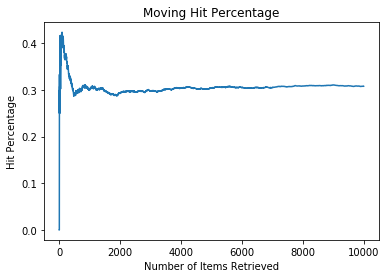

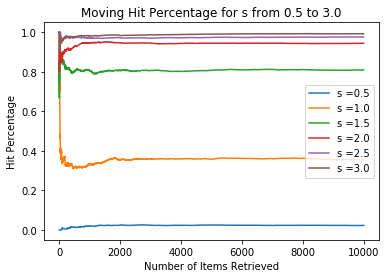

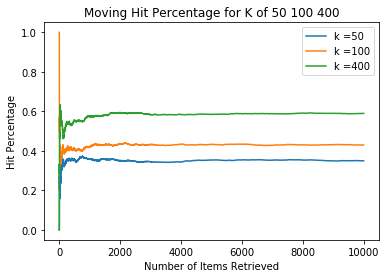

In [90]:
# 1 
# random replacement policy
# no need to redefine the cache_hit function, but we need to redefine the chache_miss func

def cache_missR(cache, item):
    index =  np.random.randint(np.size(cache))
    for i in range(index,np.size(cache)-1):
        cache[i]=cache[i+1]
    cache[np.size(cache)-1] = item
    return cache
# now plot the new gragh using Random replacement policy
hitsR = 0. #Keeps track of the number of hits in the cache
hit_avR = [] #Keeps track of the hit average
cacheR = [] #List to represent the cache
while np.size(cacheR) < k:                 
    rv = rv_zipf.rvs()-1   #Random variate from the zipf distribution
    item = names[rv]    #Item to be retrieved
    cacheR.append(item)
        
for i in range(r):
    rv = rv_zipf.rvs()-1   #Random variate from the zipf distribution
    item = names[rv]    #Item to be retrieved
    if item in cacheR:
        cacheR = cache_hit(cacheR, item)
        hitsR = hitsR+1
    else:
        cacheR = cache_missR(cacheR, item)
    hit_avR.append(hitsR/(i+1))

plt.plot(hit_avR)
plt.title('Moving Hit Percentage')
plt.xlabel('Number of Items Retrieved')
plt.ylabel('Hit Percentage')
print 'Hit Percentage:', hit_avR[np.size(hit_avR)-1],'\n'

print '\n now varying s'    

# 2

# vary s from 0.5 to 3
plt.figure()
plt.title('Moving Hit Percentage for s from 0.5 to 3.0')
plt.xlabel('Number of Items Retrieved')
plt.ylabel('Hit Percentage')
s = 0.5
while (s<=3):
    # regenerate the zip distribution
    rv_zipfNew = zipf(s,np.size(names))
    # plo the graph
    hitsN = 0. #Keeps track of the number of hits in the cache
    hit_avN = [] #Keeps track of the hit average
    cacheN = [] #List to represent the cache
    while np.size(cacheN) < k:                 
        rv = rv_zipfNew.rvs()-1   #Random variate from the zipf distribution
        item = names[rv]    #Item to be retrieved
        cacheN.append(item)
        
    for i in range(r):
        rv = rv_zipfNew.rvs()-1   #Random variate from the zipf distribution
        item = names[rv]    #Item to be retrieved
        if item in cacheN:
            cacheN = cache_hit(cacheN, item)
            hitsN = hitsN+1
        else:
            cacheN = cache_miss(cacheN, item)
        hit_avN.append(hitsN/(i+1))
    
    plt.plot(hit_avN,label='s ='+ str(s))
 
    
    print 'Hit Percentage for s =',s ,':', hit_avN[np.size(hit_avN)-1]
    s += 0.5
plt.legend(loc='center right')
print '\n now varying k'    
    
# 3
# now set s = 0.1 and k equal to 50,100,400
plt.figure()
plt.title('Moving Hit Percentage for K of 50 100 400')
plt.xlabel('Number of Items Retrieved')
plt.ylabel('Hit Percentage')
for k in [50,100,400]:
    hitsN = 0. #Keeps track of the number of hits in the cache
    hit_avN = [] #Keeps track of the hit average
    cacheN = [] #List to represent the cache
    while np.size(cacheN) < k:                 
        rv = rv_zipf.rvs()-1   #Random variate from the zipf distribution
        item = names[rv]    #Item to be retrieved
        cacheN.append(item)
        
    for i in range(r):
        rv = rv_zipf.rvs()-1   #Random variate from the zipf distribution
        item = names[rv]    #Item to be retrieved
        if item in cacheN:
            cacheN = cache_hit(cacheN, item)
            hitsN = hitsN+1
        else:
            cacheN = cache_miss(cacheN, item)
        hit_avN.append(hitsN/(i+1))
    
    plt.plot(hit_avN,label='k ='+ str(k))
    print 'Hit Percentage for k =',k ,':', hit_avN[np.size(hit_avN)-1]
plt.legend()

__Answer:__ (Your answer here)

    1. The hit percentage in this policy is lower than the policy of LRU policy.
    2. Larger the s is, the hit percentage is more converged to 1. This is because the s value is on the exponential position and the larger the s is, the samller the p is when i increases. So if the s is very large, the rvs will mostly be the term with less index number. so by using the LRU policy, if the s is large, it means that the request is constrained to several items, wich will mostly be saved in the cache. so the hit percentage is high.
    3. The larger k is, the more terms the cache can contain, since we are usin the LRU. So the larger the cache is, the more high possible request it can contain more high possible requests, so the hit percentage is higher.
    4. For LRU probability, it can be regarded as a Markov process. Since the next state chache depends on the current sate and can have a  pobability matrix to convert(the probability of request) . For random policy, the next state isn't depend on state of the previous state(but the request).

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 3</SPAN>**

## Lab Questions:

Make sure to complete all lab questions 1-3 for this weeks lab.

<div class="alert alert-block alert-warning"> 
## Academic Integrity Statement ##

By submitting the lab with this statement, you declare you have written up the lab entirely by yourself, including both code and markdown cells. You also agree that you should not share your code with anyone else. Any violation of the academic integrity requirement may cause an academic integrity report to be filed that could go into your student record. See <a href="https://provost.illinois.edu/policies/policies/academic-integrity/students-quick-reference-guide-to-academic-integrity/">Students' Quick Reference Guide to Academic Integrity</a> for more information. 